In [1]:
import math
import re
import sys
import os
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from scipy import stats
import lib.common as common
import lib.ppk2_tools as ppk2_tools
common.set_environment_variable()
plt.rcParams["font.size"] = 18 

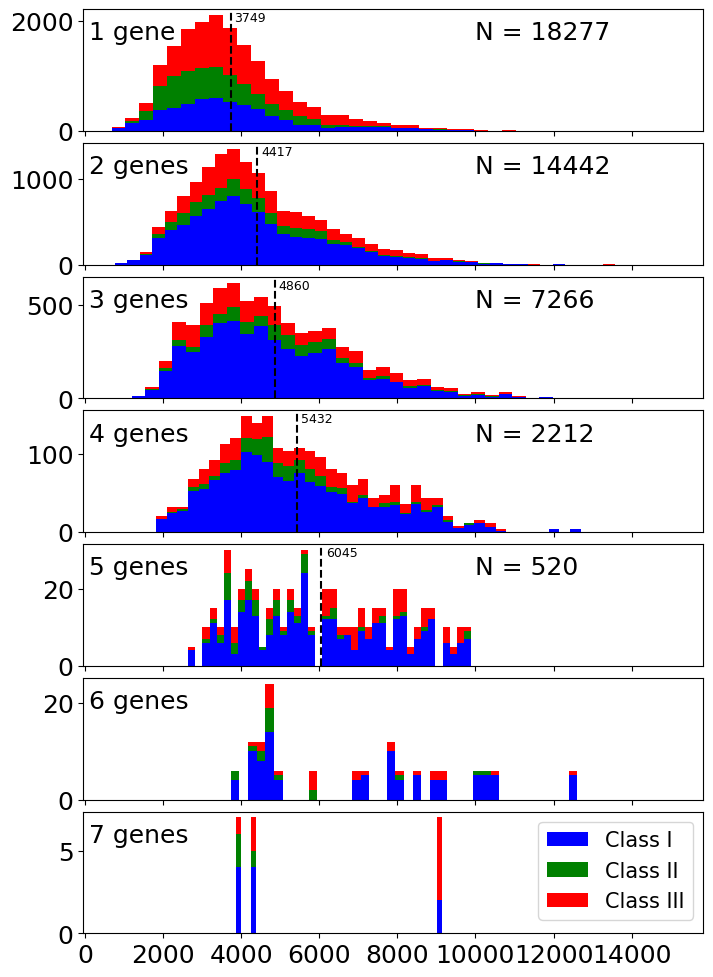

In [2]:
# Fig2A
plt.rcParams["figure.figsize"] = [8,12]
table_path = os.environ["Describe"]
df_ppk2_all = pd.read_table(table_path) 

one_isoform_list = [];two_isoform_list = [];three_isoform_list = [];four_isoform_list = [];five_isoform_list = [];six_isoform_list = [];seven_isoform_list = []
for org_accession in list(set(df_ppk2_all.org_accession)):
    df_tmp = df_ppk2_all[df_ppk2_all["org_accession"] == org_accession]
    ppk2_num = len(df_tmp)
    if ppk2_num == 1:
        one_isoform_list.append(list(df_tmp["orf_number"])[0])
    elif ppk2_num ==2:
        two_isoform_list.append(list(df_tmp["orf_number"])[0])
    elif ppk2_num ==3:
        three_isoform_list.append(list(df_tmp["orf_number"])[0])
    elif ppk2_num ==4:
        four_isoform_list.append(list(df_tmp["orf_number"])[0])
    elif ppk2_num ==5:
        five_isoform_list.append(list(df_tmp["orf_number"])[0])
    elif ppk2_num ==6:
        six_isoform_list.append(list(df_tmp["orf_number"])[0])
    elif ppk2_num ==7:
        seven_isoform_list.append(list(df_tmp["orf_number"])[0])
isoform2orfnum_list =[one_isoform_list,two_isoform_list,three_isoform_list,four_isoform_list,five_isoform_list,six_isoform_list,seven_isoform_list]

ppk2_summarize_dict_list = []
finished_accession_list = []
for org_accession in list(set(df_ppk2_all.org_accession)):
    class1 = 0; class2 = 0; class3 = 0
    df_tmp = df_ppk2_all[df_ppk2_all["org_accession"] == org_accession]
    class_list = list(df_tmp['ppk2_class'])
    for ppk2_class in class_list:
        if ppk2_class == 1:
            class1 += 1
        if ppk2_class == 2:
            class2 += 1
        if ppk2_class == 3:
            class3 += 1
    ppk2_summarize_dict = {"org_accession":org_accession,"ppk2_number":len(class_list),"orf_number":list(df_tmp["orf_number"])[0],"class1":class1,"class2":class2,"class3":class3}
    ppk2_summarize_dict_list.append(ppk2_summarize_dict)
    finished_accession_list.append(org_accession)

df_ppk2_number = pd.DataFrame(ppk2_summarize_dict_list)
df_ppk2_number = df_ppk2_number.sort_values('orf_number')

fig,axes = plt.subplots(7,1,sharex=True)
fig.subplots_adjust(hspace=0.1)
fig.patch.set_color("white")
for num in range(0,7):
    df_ppk2_number_x = df_ppk2_number[df_ppk2_number["ppk2_number"] == num+1]
    class1_orf_number = []
    class2_orf_number = []
    class3_orf_number = []
    for index,item in df_ppk2_number_x.iterrows():
        for i in range(int(item.class1)):
            class1_orf_number.append(item.orf_number)
        for i in range(int(item.class2)):
            class2_orf_number.append(item.orf_number)
        for i in range(int(item.class3)):
            class3_orf_number.append(item.orf_number)
    axes[num].hist([class1_orf_number,class2_orf_number,class3_orf_number,],bins = 40,stacked= True,color = ["blue","green","red"],label = ['Class I','Class II','Class III'])
    text_y = axes[num].get_ylim()[1]*0.75
    if num == 0:
        axes[num].text(100,text_y,f"{num+1} gene")
    else:
        axes[num].text(100,text_y,f"{num+1} genes")
    if num <= 4:
        axes[num].text(10000,text_y,f"N = {len(df_ppk2_number_x)*(num+1)}")
        axes[num].axvline(mean(isoform2orfnum_list[num]),color ='k', linestyle='--')
        axes[num].text(mean(isoform2orfnum_list[num])*1.02,axes[num].get_ylim()[1]*0.9,f"{int(mean(isoform2orfnum_list[num]))}",fontsize=9)
    if num == 6:
        axes[num].legend(prop={'size': 15})
fig.align_labels()
plt.show()


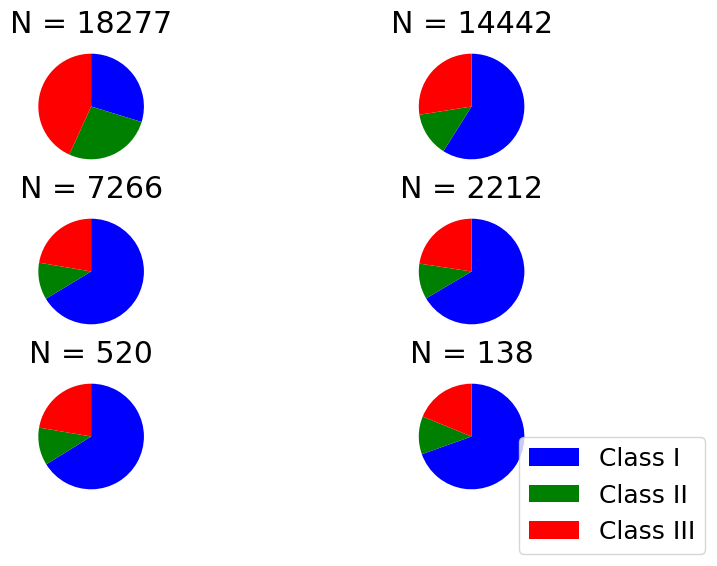

In [3]:
plt.rcParams["figure.figsize"] = [12,12]

def create_pie_fig(decided_ppk2_num,df_ppk2_all):
    class1_num=0
    class2_num=0
    class3_num=0
    ppk2_total_num=0 
    org_accession = list(set(list(df_ppk2_all.loc[:,"org_accession"])))
    for org in org_accession:
        class_list = list(df_ppk2_all[df_ppk2_all['org_accession']==org]['ppk2_class'])
        ppk2_num = len(class_list)
        if ppk2_num == decided_ppk2_num:
            ppk2_total_num += ppk2_num
            for ppk2_class in class_list:
                if ppk2_class == 1:
                    class1_num +=1
                elif ppk2_class == 2:
                    class2_num +=1
                elif ppk2_class == 3:
                    class3_num +=1
    x=[class1_num, class2_num, class3_num]
    labels = ['Class I', 'Class II', 'Class III']
    pie_colors = ["b", "g", "r"]
    return x, labels, pie_colors, ppk2_total_num


table_path = os.environ["Describe"]
df_ppk2_all = pd.read_table(table_path) 
fig,axes = plt.subplots(3,2,figsize=(9,6))
fig.subplots_adjust(hspace=0.25)
fig.patch.set_color('white')
for i in range(1,7):
    x, labels, pie_colors, ppk2_total_num = create_pie_fig(i,df_ppk2_all)
    pos_i = i -1
    q,r = divmod(pos_i,2)
    axes[q][r].pie(x,startangle=90,counterclock=False,labeldistance=None,colors=pie_colors)
    axes[q][r].set_title(f"N = {ppk2_total_num}")
fig.legend(labels, loc = 'lower right')
plt.show()


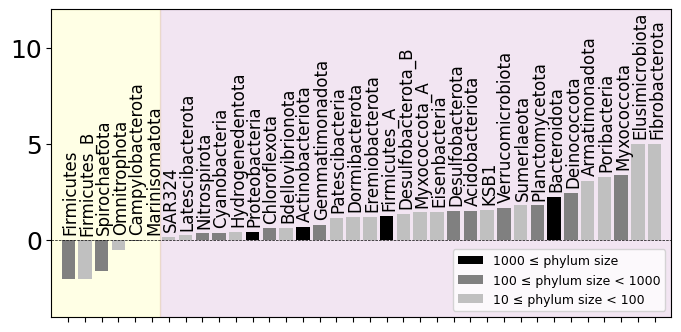

In [ ]:
ppk2_table = ppk2_tools.create_ppk2_describe_df()
plt.rcParams["figure.figsize"] = [8,4]
single_class1_ratio_by_phylum = {}
multiple_c1_ratio_by_phylum = {}
species_num_in_phylum_dict = {}

all_phylum = list(ppk2_table.taxonomy)
all_phylum = list(set([taxonomy.split(';')[1] for taxonomy in all_phylum]))	
for phylum in all_phylum:
    phylum_dict = {}
    single_total_class_list = []
    multiple_total_class_list = []
    single_ppk2_org_num = 0
    multiple_ppk2_org_num = 0
    for idx,row in ppk2_table.iterrows():
        if row.taxonomy.split(';')[1] == phylum:
            phylum_dict[idx]=dict(row)
    df_phylum = pd.DataFrame(phylum_dict).T
    if len(set(df_phylum.org_accession)) < 10: #門が小さいのはスキップ
        continue
    for org_accession in list(set(df_phylum.org_accession)):
        df_phylum_by_org = df_phylum[df_phylum['org_accession'] == org_accession]
        if len(df_phylum_by_org) == 1:
            single_ppk2_org_num += 1
            ppk2_class = list(df_phylum_by_org.ppk2_class)
            single_total_class_list += ppk2_class
        elif len(df_phylum_by_org) > 1:
            multiple_ppk2_org_num += 1
            ppk2_class = list(df_phylum_by_org.ppk2_class)
            multiple_total_class_list += ppk2_class

    single_total_class_counter = collections.Counter(single_total_class_list)
    multiple_total_class_counter = collections.Counter(multiple_total_class_list)

    if len(single_total_class_list) ==0 and len(multiple_total_class_list)==0:
        single_class1_ratio = 0
        multiple_class1_ratio = 0
    if len(single_total_class_list) > 0 and len(multiple_total_class_list)==0:
        single_class1_ratio = single_total_class_counter[1]/len(single_total_class_list)
        multiple_class1_ratio = 0
    elif len(single_total_class_list) == 0 and len(multiple_total_class_list) > 0:
        single_class1_ratio = 0
        multiple_class1_ratio = multiple_total_class_counter[1]/len(multiple_total_class_list)
    else:
        single_class1_ratio = single_total_class_counter[1]/len(single_total_class_list)
        multiple_class1_ratio = multiple_total_class_counter[1]/len(multiple_total_class_list)
    if single_class1_ratio == 0 and multiple_class1_ratio == 0:
        continue
    single_class1_ratio_by_phylum[phylum] = single_class1_ratio
    multiple_c1_ratio_by_phylum[phylum] = multiple_class1_ratio
    species_num_in_phylum_dict[phylum] = len(df_phylum)

phylum_list = single_class1_ratio_by_phylum.keys()
single_multiple_ratio_by_phylum = {}
for phylum in phylum_list:
    if single_class1_ratio_by_phylum[phylum] == 0:
        if multiple_c1_ratio_by_phylum[phylum] > 0:
            single_multiple_ratio_by_phylum[phylum] = 32 #例外
        else:
            continue
    else:
        if multiple_c1_ratio_by_phylum[phylum] == 0:
            single_multiple_ratio_by_phylum[phylum] = -2
        else:
            single_multiple_ratio_by_phylum[phylum] = multiple_c1_ratio_by_phylum[phylum]/single_class1_ratio_by_phylum[phylum]

fig,ax = plt.subplots(1,1)
single_multiple_ratio_by_phylum_list = sorted(single_multiple_ratio_by_phylum.items(), key=lambda x:x[1])
large_phylum_idx_list = []; medium_phylum_idx_list = []; small_phylum_idx_list = []; very_small_phylum_idx_list = []
large_phylum_value_list = []; medium_phylum_value_list = []; small_phylum_value_list = []; very_small_phylum_value_list = []
for idx,phylum_tup in enumerate(single_multiple_ratio_by_phylum_list):
    if species_num_in_phylum_dict[phylum_tup[0]] >= 1000:
        large_phylum_idx_list.append(idx+1)
        if phylum_tup[1] > 0:
            large_phylum_value_list.append(math.log2(phylum_tup[1]))
        else:
            large_phylum_value_list.append(phylum_tup[1])

    elif species_num_in_phylum_dict[phylum_tup[0]] >= 100:
        medium_phylum_idx_list.append(idx+1)
        if phylum_tup[1] > 0:
            medium_phylum_value_list.append(math.log2(phylum_tup[1]))
        else:
            medium_phylum_value_list.append(phylum_tup[1])
    elif species_num_in_phylum_dict[phylum_tup[0]] >= 10:
        small_phylum_idx_list.append(idx+1)
        if phylum_tup[1] > 0:
            small_phylum_value_list.append(math.log2(phylum_tup[1]))
        else:
            small_phylum_value_list.append(phylum_tup[1])
    else:
        very_small_phylum_idx_list.append(idx+1)
        if phylum_tup[1] > 0:
            very_small_phylum_value_list.append(math.log2(phylum_tup[1]))
        else:
            very_small_phylum_value_list.append(phylum_tup[1])
plt.axvspan(0, 6.5, color='yellow', alpha=0.1)
plt.axvspan(6.5, len(single_multiple_ratio_by_phylum_list)+1,color='purple', alpha=0.1)
ax.bar(large_phylum_idx_list,large_phylum_value_list,color='k',label='1000 ≤ phylum size')
ax.bar(medium_phylum_idx_list,medium_phylum_value_list,color='grey',label='100 ≤ phylum size < 1000')
ax.bar(small_phylum_idx_list,small_phylum_value_list,color='silver',label='10 ≤ phylum size < 100')
ax.bar(very_small_phylum_idx_list,very_small_phylum_value_list,color='white',edgecolor='k',linewidth=0.2)

ax.set_xlim([0,len(single_multiple_ratio_by_phylum_list)+1])
ax.set_ylim([-4,12])
ax.axhline(y=0,color='k',linestyle='--',linewidth=0.5)
phylum_idx = [i+1 for i in range(len(single_multiple_ratio_by_phylum_list))]

plt.xticks(phylum_idx,['' for i in range(len(single_multiple_ratio_by_phylum_list))])
plt.legend(loc = 'lower right',prop={'size': 9})
for i in range(1,len(single_multiple_ratio_by_phylum_list)+1):
    
    if single_multiple_ratio_by_phylum_list[i-1][1] <= 0:
        text_height = 0.5
    else:
        text_height = math.log2(single_multiple_ratio_by_phylum_list[i-1][1]) 
        if text_height > 0:
            text_height += 0.5
        else:
            text_height = 0.5

    ax.text(i-0.4,text_height,re.sub('p__','',single_multiple_ratio_by_phylum_list[i-1][0]),rotation = 90,fontsize=12)
    








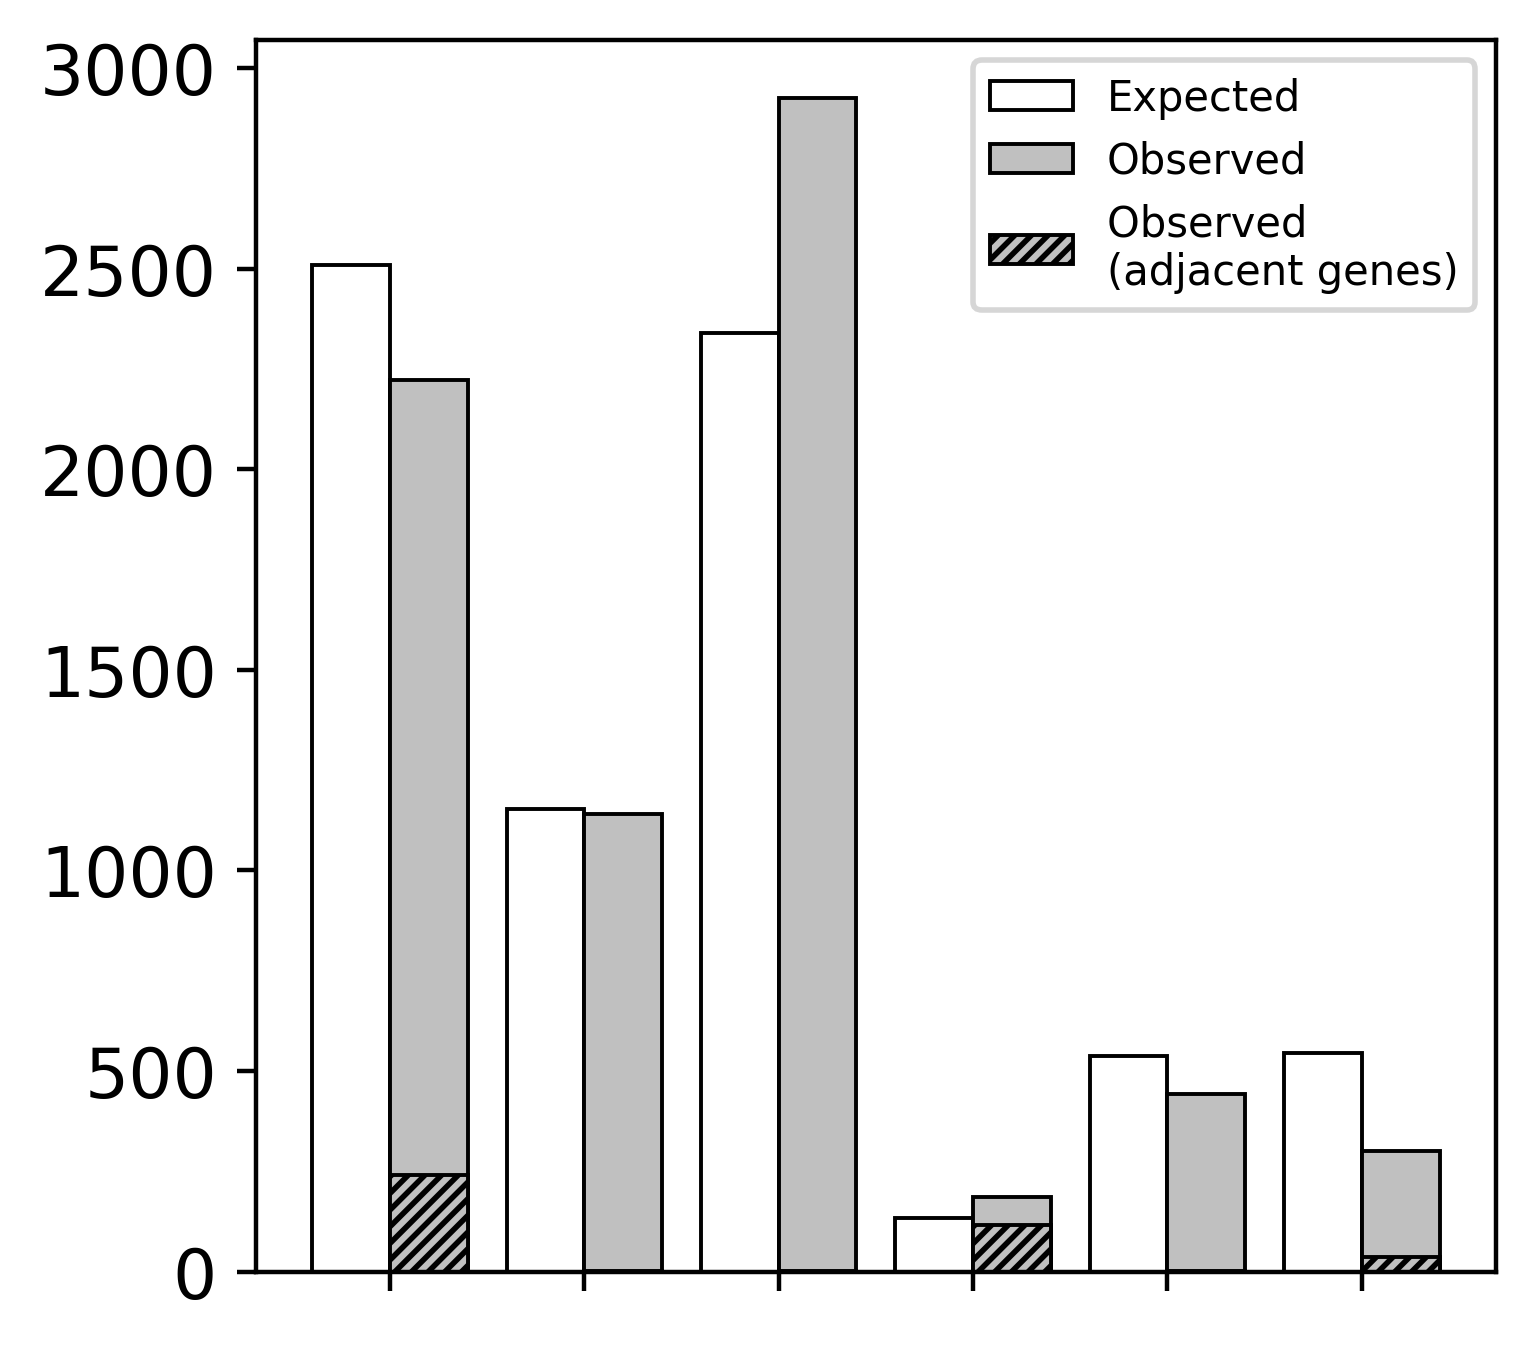

In [7]:
plt.rcParams["font.size"] = 12.5
plt.rcParams["figure.dpi"] = 400
plt.rcParams["figure.figsize"] = [4,4]


table_path = os.environ["Describe"]
df_ppk2_all = pd.read_table(table_path) 
ppk2_pair_dict_list = []
for org_accession in list(set(df_ppk2_all.org_accession)):
    df_tmp = df_ppk2_all[df_ppk2_all['org_accession'] == org_accession]
    if len(df_tmp) == 2:
        duplicate_state = 0
        if set(df_tmp.ppk2_duplicate) == {1}:
            duplicate_state = 1
        ppk2_pair_accessions = list(df_tmp.gene_accession)
        ppke_pair_class = list(df_tmp.ppk2_class)
        ppk2_pair_dict = {'org_accession':org_accession,'accession_no1':ppk2_pair_accessions[0],'class_no1':ppke_pair_class[0],'accession_no2':ppk2_pair_accessions[1],'class_no2':ppke_pair_class[1],'duplicate_state':duplicate_state}
        ppk2_pair_dict_list.append(ppk2_pair_dict)
df_ppk2_pair = pd.DataFrame(ppk2_pair_dict_list)


#pair count
c1c1=0; c1c2=0; c1c3=0; c2c2=0; c2c3=0; c3c3=0
c1c1_d=0; c1c2_d=0; c1c3_d=0; c2c2_d=0; c2c3_d=0; c3c3_d=0

for idx,row in df_ppk2_pair.iterrows():
    pair_set = {row.class_no1,row.class_no2}
    if pair_set == {1}:
        c1c1 += 1
        if row.duplicate_state == 1:
            c1c1_d += 1
    elif pair_set == {1,2}:
        c1c2 += 1
        if row.duplicate_state == 1:
            c1c2_d += 1
    elif pair_set == {1,3}:
        c1c3 += 1
        if row.duplicate_state == 1:
            c1c3_d += 1        
    elif pair_set == {2}:
        c2c2 += 1
        if row.duplicate_state == 1:
            c2c2_d += 1           
    elif pair_set == {2,3}:
        c2c3 += 1
        if row.duplicate_state == 1:
            c2c3_d += 1          
    elif pair_set == {3}:
        c3c3 += 1 
        if row.duplicate_state == 1:
            c3c3_d += 1      

observed_pair_list = [c1c1,c1c2,c1c3,c2c2,c2c3,c3c3]

ppk2_pair_class = list(df_ppk2_pair.class_no1) + list(df_ppk2_pair.class_no2)
ppk2_class_counter = collections.Counter(ppk2_pair_class)
class1_ratio = ppk2_class_counter[1]/len(ppk2_pair_class)
class2_ratio = ppk2_class_counter[2]/len(ppk2_pair_class)
class3_ratio = ppk2_class_counter[3]/len(ppk2_pair_class)
org_num = len(df_ppk2_pair)
e_c1c1 = org_num * class1_ratio * class1_ratio
e_c1c2 = 2 * org_num * class1_ratio * class2_ratio
e_c1c3 = 2 * org_num * class1_ratio * class3_ratio
e_c2c2 =  org_num * class2_ratio * class2_ratio
e_c2c3 = 2 * org_num * class2_ratio * class3_ratio
e_c3c3 =  org_num * class3_ratio * class3_ratio

expected_pair_list = [e_c1c1,e_c1c2,e_c1c3,e_c2c2,e_c2c3,e_c3c3]

bar_width = 0.4
x = np.array([1,2,3,4,5,6])
x_exp = x - bar_width/2
x_obs = x + bar_width/2
y_exp = np.array(expected_pair_list)
y_obs = np.array(observed_pair_list)
y_adjacent = [c1c1_d,c1c2_d,c1c3_d,c2c2_d,c2c3_d,c3c3_d]
fig,ax = plt.subplots(figsize = (4,4))
plt.yticks()
plt.xticks(x,["","","","","",""])
labels = plt.get_figlabels()
ax.bar(x_exp,y_exp,label='Expected',width=bar_width,color="white",edgecolor="k",linewidth=0.7 )
ax.bar(x_obs,y_obs,label='Observed',width=bar_width,color="silver",edgecolor="k",linewidth=0.7)
ax.bar(x_obs,y_adjacent,label="Observed \n(adjacent genes)",width=bar_width,color="silver",edgecolor="k",linewidth=0.7,hatch='////////')
plt.legend(prop={'size': 7.5},loc = 'upper right')
plt.show()








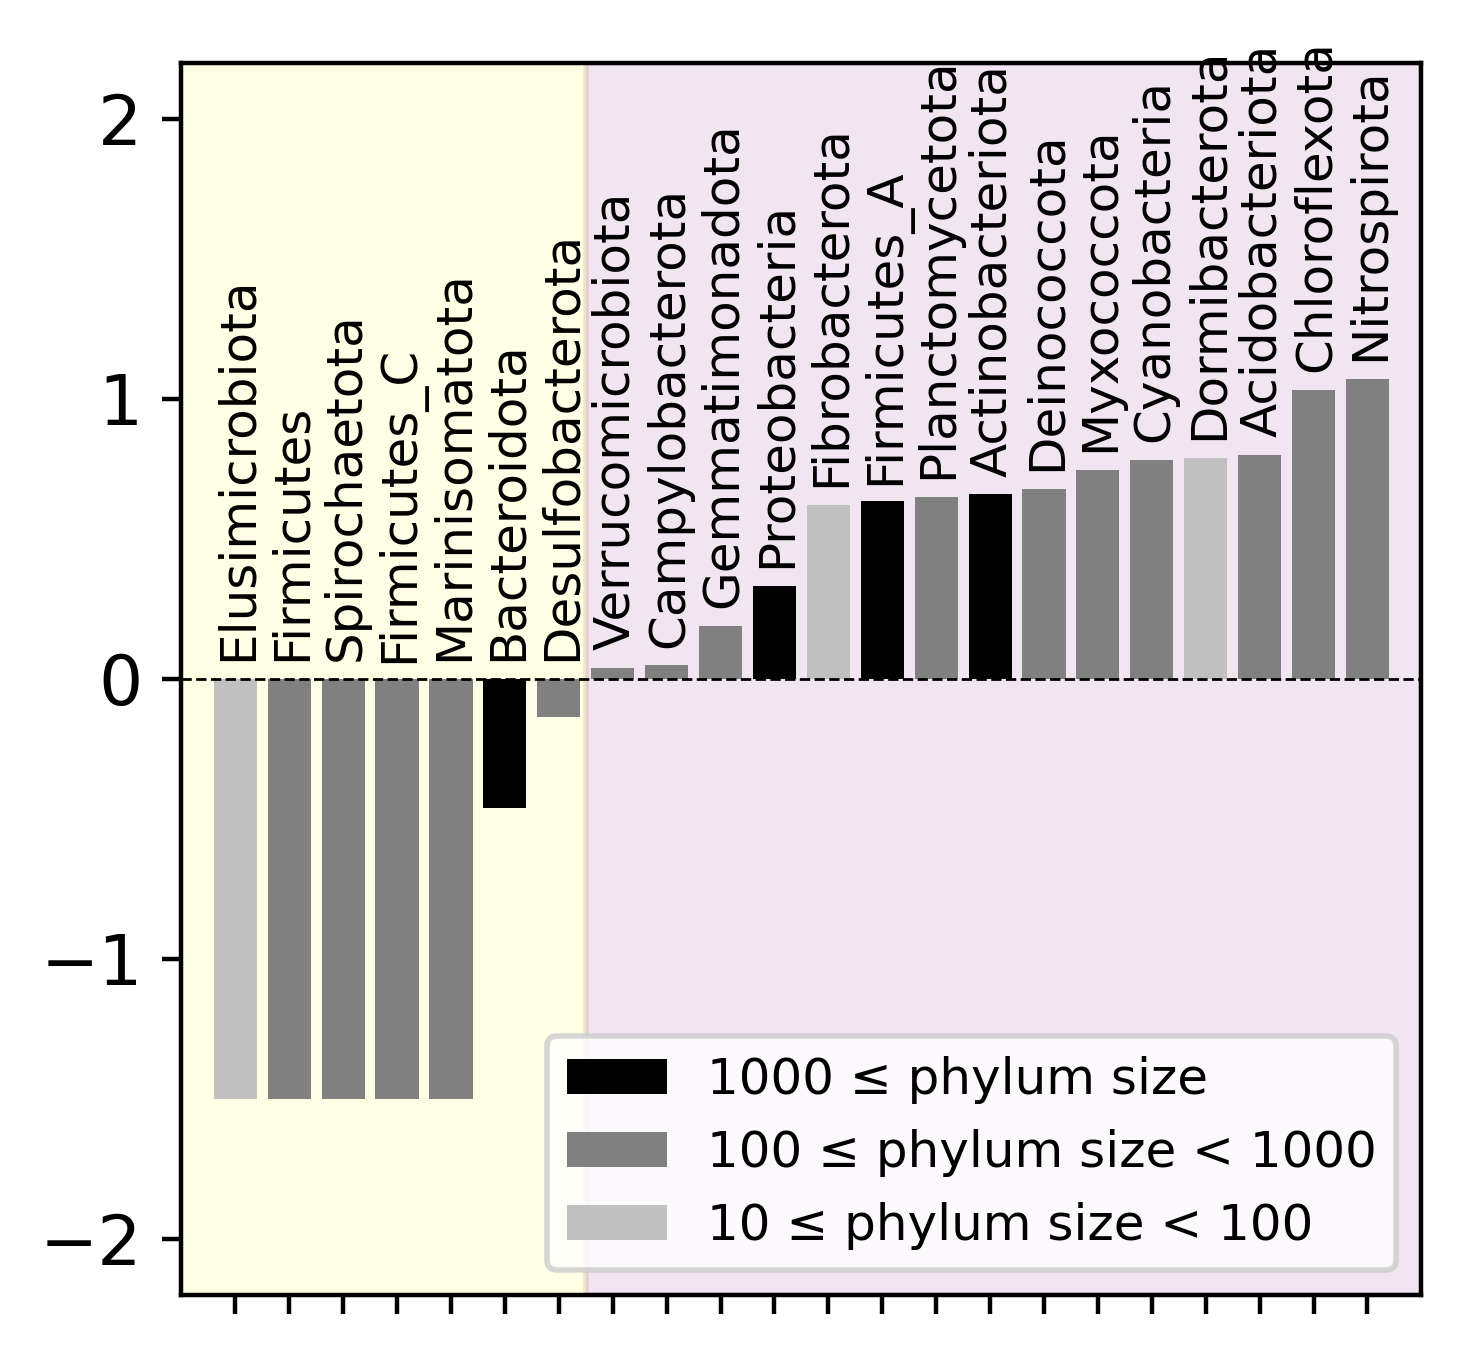

In [9]:
ppk2_table = ppk2_tools.create_ppk2_describe_df()
ppk2_table
pair_expected_by_phylum = {}
pair_observed_by_phylum = {}
species_num_in_phylum_dict = {}


all_phylum = list(ppk2_table.taxonomy)
all_phylum = list(set([taxonomy.split(';')[1] for taxonomy in all_phylum]))	
for phylum in all_phylum:
    phylum_dict = {}
    total_class_list = []
    two_ppk2_org_num = 0
    c1_c1_pair = 0
    c1_c2_pair = 0
    c1_c3_pair = 0
    c2_c2_pair = 0
    c2_c3_pair = 0
    c3_c3_pair = 0
    for idx,row in ppk2_table.iterrows():
        if row.taxonomy.split(';')[1] == phylum:
            phylum_dict[idx]=dict(row)
    df_phylum = pd.DataFrame(phylum_dict).T
    for org_accession in list(set(df_phylum.org_accession)):
        df_phylum_by_org = df_phylum[df_phylum['org_accession'] == org_accession]
        if len(df_phylum_by_org) == 2:
            two_ppk2_org_num += 1
            ppk2_class_pair = list(df_phylum_by_org.ppk2_class)
            total_class_list += ppk2_class_pair
            if set(ppk2_class_pair) == {1}:
                c1_c1_pair += 1
            elif set(ppk2_class_pair) == {1,2}:
                c1_c2_pair += 1
            elif set(ppk2_class_pair) == {1,3}:
                c1_c3_pair += 1
            elif set(ppk2_class_pair) == {2}:
                c2_c2_pair += 1
            elif set(ppk2_class_pair) == {2,3}:
                c2_c3_pair += 1
            elif set(ppk2_class_pair) == {3}:
                c3_c3_pair += 1
            else:
                print(ppk2_class_pair)
    if two_ppk2_org_num <10:
        continue
    total_class_counter = collections.Counter(total_class_list)
    
    pair_expected = two_ppk2_org_num*(total_class_counter[1]/len(total_class_list))*(total_class_counter[3]/len(total_class_list))*2
    pair_expected_by_phylum[phylum] = pair_expected
    pair_observed_by_phylum[phylum] = (c1_c3_pair) #phylum org num
    species_num_in_phylum_dict[phylum] = len(df_phylum)

phylum_list = pair_expected_by_phylum.keys()
pair_observed_expected_ratio_by_phylum = {}
for phylum in phylum_list:
    if pair_observed_by_phylum[phylum] == 0:
        pair_observed_expected_ratio_by_phylum[phylum] = -1.5
        continue
    else:
        pair_observed_expected_ratio_by_phylum[phylum] = pair_observed_by_phylum[phylum]/pair_expected_by_phylum[phylum] 

fig,ax = plt.subplots(1,1)
pair_observed_expected_ratio_by_phylum_list = sorted(pair_observed_expected_ratio_by_phylum.items(), key=lambda x:x[1])
large_phylum_idx_list = []; medium_phylum_idx_list = []; small_phylum_idx_list = []
large_phylum_value_list = []; medium_phylum_value_list = []; small_phylum_value_list = []

for idx,phylum_tup in enumerate(pair_observed_expected_ratio_by_phylum_list):
    if species_num_in_phylum_dict[phylum_tup[0]] >= 1000:
        large_phylum_idx_list.append(idx+1)
        if phylum_tup[1] > 0:
            large_phylum_value_list.append(math.log2(phylum_tup[1]))
        else:
            large_phylum_value_list.append(phylum_tup[1])

    elif species_num_in_phylum_dict[phylum_tup[0]] >= 100:
        medium_phylum_idx_list.append(idx+1)
        if phylum_tup[1] > 0:
            medium_phylum_value_list.append(math.log2(phylum_tup[1]))
        else:
            medium_phylum_value_list.append(phylum_tup[1])
    elif species_num_in_phylum_dict[phylum_tup[0]] >= 10:
        small_phylum_idx_list.append(idx+1)
        if phylum_tup[1] > 0:
            small_phylum_value_list.append(math.log2(phylum_tup[1]))
        else:
            small_phylum_value_list.append(phylum_tup[1])
plt.axvspan(0, 7.5, color='yellow', alpha=0.1)
plt.axvspan(7.5, len(pair_observed_expected_ratio_by_phylum_list)+1,color='purple', alpha=0.1)
ax.bar(large_phylum_idx_list,large_phylum_value_list,color='k',label='1000 ≤ phylum size')
ax.bar(medium_phylum_idx_list,medium_phylum_value_list,color='grey',label='100 ≤ phylum size < 1000')
ax.bar(small_phylum_idx_list,small_phylum_value_list,color='silver',label='10 ≤ phylum size < 100')
ax.set_xlim([0,len(pair_observed_expected_ratio_by_phylum_list)+1])
ax.set_ylim([-2.2,2.2])
ax.axhline(y=0,color='k',linestyle='--',linewidth=0.5)

phylum_idx = [i+1 for i in range(len(pair_observed_expected_ratio_by_phylum_list))]
plt.xticks(phylum_idx,['' for i in range(len(pair_observed_expected_ratio_by_phylum_list))])
plt.legend(loc = 'lower right',prop={'size': 9})
for i in range(1,len(pair_observed_expected_ratio_by_phylum_list)+1):
    if pair_observed_expected_ratio_by_phylum_list[i-1][1] > 0:
        text_height = math.log2(pair_observed_expected_ratio_by_phylum_list[i-1][1])+0.1
    else:
        text_height = 0.1 #0.5
    if text_height < 0.1:
        text_height = 0.1
    text_phylum = pair_observed_expected_ratio_by_phylum_list[i-1][0]
    ax.text(i-0.4,text_height,re.sub('p__','',pair_observed_expected_ratio_by_phylum_list[i-1][0]),rotation = 90,fontsize=9)
plt.show()





